# Climate Analysis

A Close look at climate between cities - Seattle, WA and Bloomington, IN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics

plt.style.use('classic')
%matplotlib inline

## Bloomington, IN

In [2]:
# Data Found:
# https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00120784/detail

df = pd.read_csv("../data/2017_bloomington_climate.csv")

In [3]:
"""
PRCP - Precipitation
SNOW - Snowfall
SNWD - Snow Depth
TMAX - Maximum Temperature
TMIN - Minimum Temperature
TOBS - Temperature at the time of observation
WT* - Weather Types
"""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 15 columns):
STATION    365 non-null object
NAME       365 non-null object
DATE       365 non-null object
PRCP       365 non-null float64
SNOW       365 non-null float64
SNWD       365 non-null float64
TMAX       365 non-null int64
TMIN       365 non-null int64
TOBS       365 non-null int64
WT01       22 non-null float64
WT03       8 non-null float64
WT04       0 non-null float64
WT05       1 non-null float64
WT06       0 non-null float64
WT11       1 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 42.9+ KB


In [4]:
df.describe()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,22.0,8.0,0.0,1.0,0.0,1.0
mean,0.127014,0.010137,0.021918,65.052055,45.232877,49.186301,1.0,1.0,NaN,1.0,NaN,1.0
std,0.318707,0.085364,0.146616,18.952080,16.713586,16.488368,0.0,0.0,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,11.000000,-2.000000,-2.000000,1.0,1.0,NaN,1.0,NaN,1.0
25%,0.000000,0.000000,0.000000,51.000000,32.000000,37.000000,1.0,1.0,NaN,1.0,NaN,1.0
50%,0.000000,0.000000,0.000000,67.000000,47.000000,53.000000,1.0,1.0,NaN,1.0,NaN,1.0
75%,0.050000,0.000000,0.000000,82.000000,59.000000,62.000000,1.0,1.0,NaN,1.0,NaN,1.0
max,2.000000,1.100000,1.000000,95.000000,76.000000,78.000000,1.0,1.0,NaN,1.0,NaN,1.0


Let's drop weather types because they seem suspiciously recorded and the station name

In [5]:
df = df.drop(['WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11', 'STATION', 'NAME'], axis=1)

In [6]:
df.describe()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.127014,0.010137,0.021918,65.052055,45.232877,49.186301
std,0.318707,0.085364,0.146616,18.952080,16.713586,16.488368
min,0.000000,0.000000,0.000000,11.000000,-2.000000,-2.000000
25%,0.000000,0.000000,0.000000,51.000000,32.000000,37.000000
50%,0.000000,0.000000,0.000000,67.000000,47.000000,53.000000
75%,0.050000,0.000000,0.000000,82.000000,59.000000,62.000000
max,2.000000,1.100000,1.000000,95.000000,76.000000,78.000000


### Rolling Averages

In [31]:
# Create an average between max and min for SMA

df['TAVG'] = (df.TMAX + df.TMIN)/2

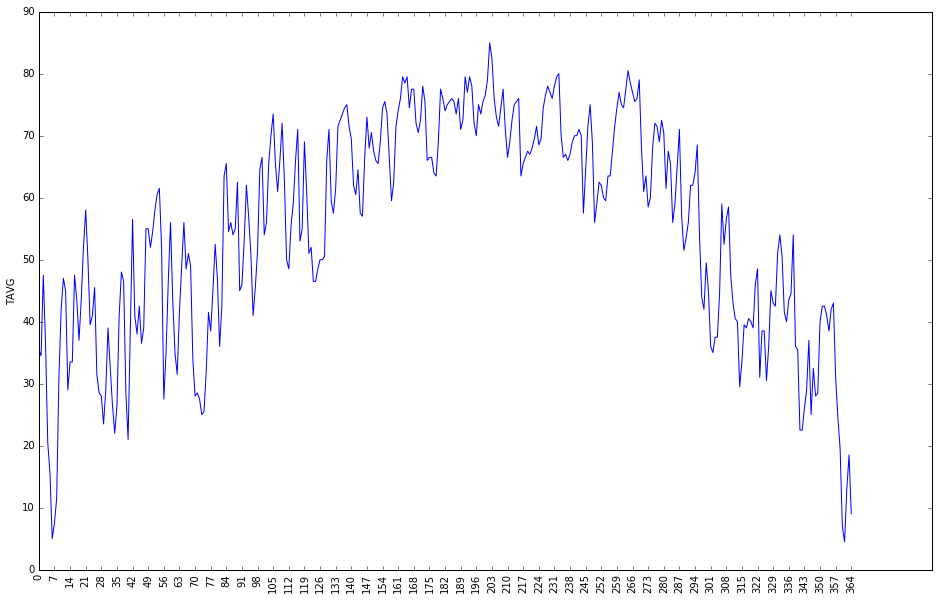

In [8]:
plt.figure(figsize=(16,10))
g = sns.lineplot(x=df.index, y='TAVG', data=df)
g.set(xticks=df.index[0::7])
g.set_xticklabels(df.index[0::7], rotation=90)

plt.show()

In [9]:
# SMA 7

df['TSMA7'] = pd.DataFrame(np.concatenate([df.TAVG.iloc[-15:].values, df.TAVG.values, df.TAVG.iloc[:15].values])).rolling(window=7, center=True).mean().iloc[15:-15].reset_index(drop=True)

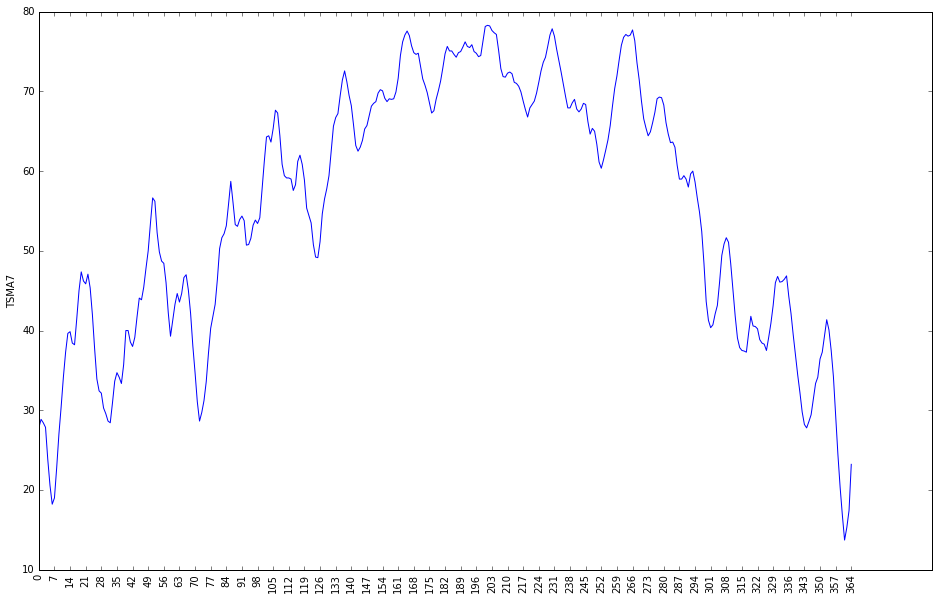

In [10]:
plt.figure(figsize=(16,10))
g = sns.lineplot(x=df.index, y='TSMA7', data=df)
g.set(xticks=df.index[0::7])
g.set_xticklabels(df.index[0::7], rotation=90)

plt.show()

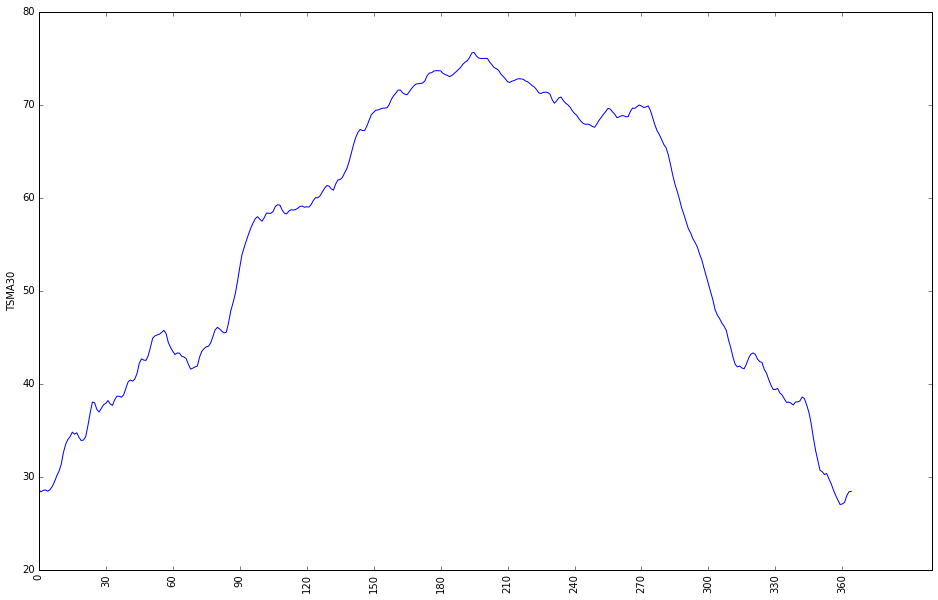

In [32]:
# SMA 30

df['TSMA30'] = pd.DataFrame(np.concatenate([df.TAVG.iloc[-15:].values, df.TAVG.values, df.TAVG.iloc[:15].values])).rolling(window=30, center=True).mean().iloc[15:-15].reset_index(drop=True)

plt.figure(figsize=(16,10))
g = sns.lineplot(x=df.index, y='TSMA30', data=df)
g.set(xticks=df.index[0::30])
g.set_xticklabels(df.index[0::30], rotation=90)

plt.show()

In [34]:
# Linear Regression - Polynomial Degree 4

x = df.index.values.reshape(-1, 1)
x = np.hstack((x, x**2, x**3, x**4))

regr = linear_model.LinearRegression()
regr.fit(x, df.TAVG)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

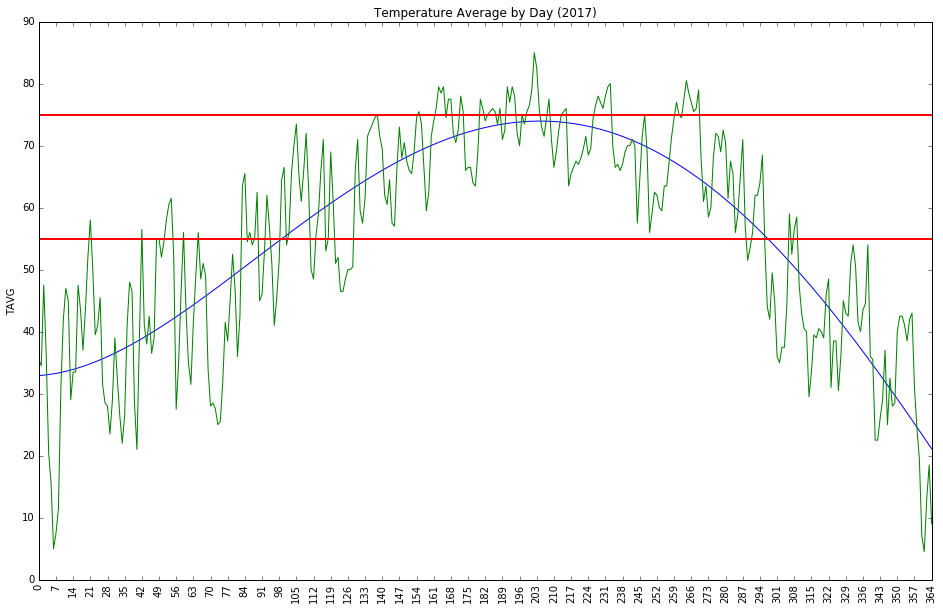

R^2: -1.4368182131014087


In [35]:
line = regr.predict(x)

plt.figure(figsize=(16,10))
g = sns.lineplot(x=df.index, y=line, data=df)
sns.lineplot(x=df.index, y='TAVG', data=df)
g.set(xticks=df.index[0::7])
g.set_xticklabels(df.index[0::7], rotation=90)
g.set_title('Temperature Average by Day (2017)')


plt.plot([0, 364], [75, 75], linewidth=2, color='red')
plt.plot([0, 364], [55, 55], linewidth=2, color='red')

plt.show()
print('R^2:', metrics.r2_score(df.index.values.reshape(-1, 1), line))

In [36]:
# "Goldilocks Zone" is what I define as a great temperature. 55-75 degree fahrenheit

print("Percent in 'Goldilocks Zone' (55-75):", len(df.TAVG[(df.TAVG <= 75) & (df.TAVG >= 55)]) / 365 * 100)

Percent in 'Goldilocks Zone' (55-75): 43.56164383561644


### Precipitation

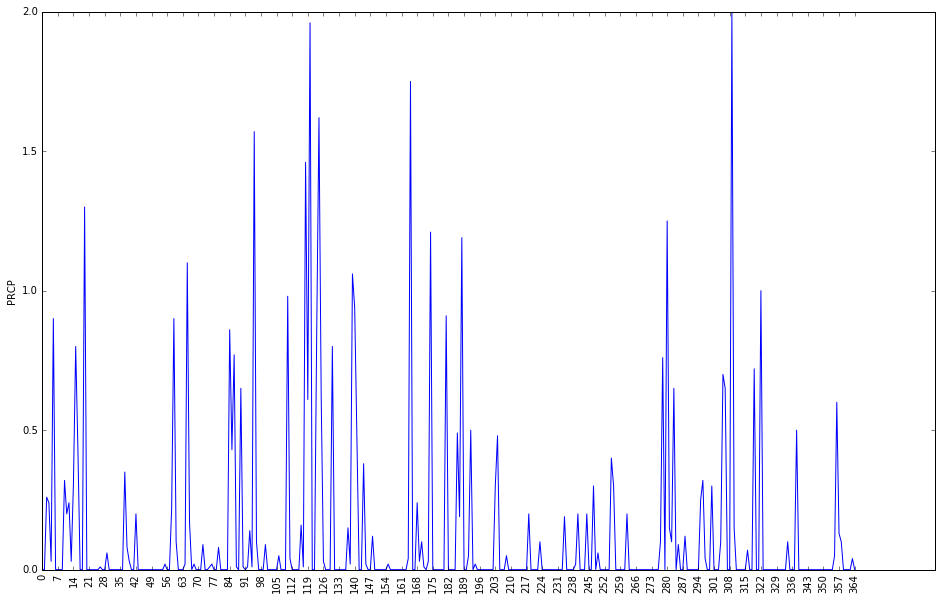

In [15]:
plt.figure(figsize=(16,10))
g = sns.lineplot(x=df.index, y='PRCP', data=df)
g.set(xticks=df.index[0::7])
g.set_xticklabels(df.index[0::7], rotation=90)

plt.show()

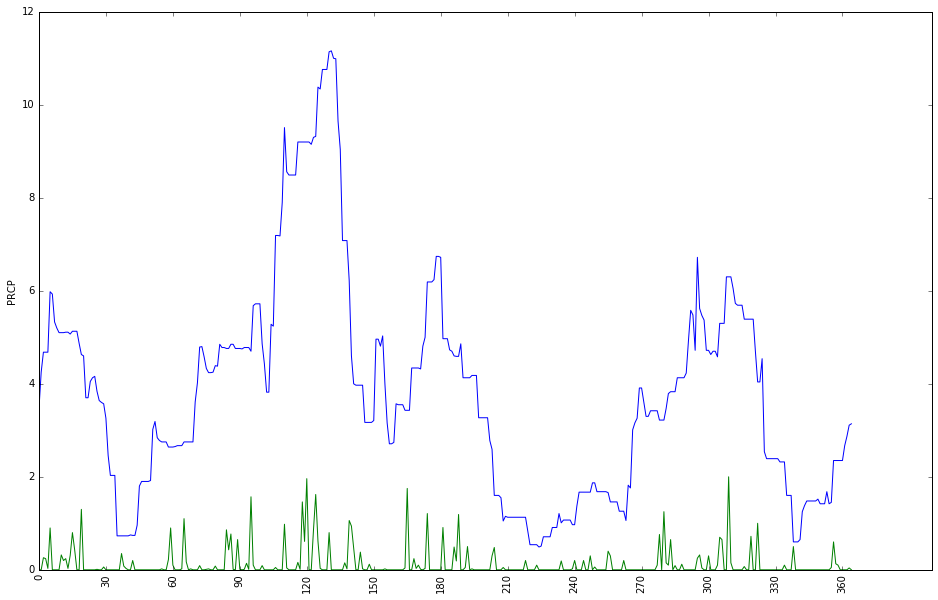

In [37]:
# SMA 30 - Rain

df['PSMS30'] =  pd.DataFrame(np.concatenate([df.PRCP.iloc[-15:].values, df.PRCP.values, df.PRCP.iloc[:15].values])).rolling(window=30, center=True).sum().iloc[15:-15].reset_index(drop=True)

plt.figure(figsize=(16,10))
g = sns.lineplot(x=df.index, y='PSMS30', data=df)
g = sns.lineplot(x=df.index, y='PRCP', data=df)
g.set(xticks=df.index[0::30])
g.set_xticklabels(df.index[0::30], rotation=90)

plt.show()

### Snow

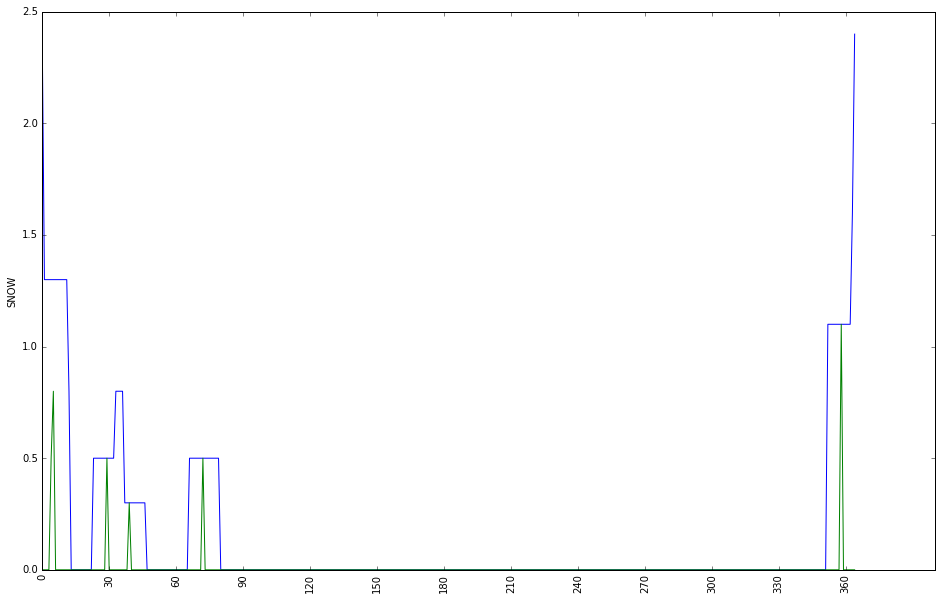

In [17]:
# SMA 14 - Snow

df['SSMS14'] =  pd.DataFrame(np.concatenate([df.SNOW.iloc[-15:].values, df.SNOW.values, df.SNOW.iloc[:15].values])).rolling(window=14, center=True).sum().iloc[15:-15].reset_index(drop=True)

plt.figure(figsize=(16,10))
g = sns.lineplot(x=df.index, y='SSMS14', data=df)
g = sns.lineplot(x=df.index, y='SNOW', data=df)
g.set(xticks=df.index[0::30])
g.set_xticklabels(df.index[0::30], rotation=90)

plt.show()

## Seattle, WA

In [18]:
# Data Found:
# https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094290/detail

df_sea = pd.read_csv("../data/2017_seattle_climate.csv")

In [19]:
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 14 columns):
STATION    365 non-null object
NAME       365 non-null object
DATE       365 non-null object
PRCP       365 non-null float64
SNOW       365 non-null float64
SNWD       365 non-null float64
TAVG       0 non-null float64
TMAX       365 non-null int64
TMIN       365 non-null int64
WT01       57 non-null float64
WT02       2 non-null float64
WT03       5 non-null float64
WT04       3 non-null float64
WT08       16 non-null float64
dtypes: float64(9), int64(2), object(3)
memory usage: 40.0+ KB


In [20]:
# Create an average between max and min with SMA

df_sea['TAVG'] = (df_sea.TMAX + df_sea.TMIN)/2

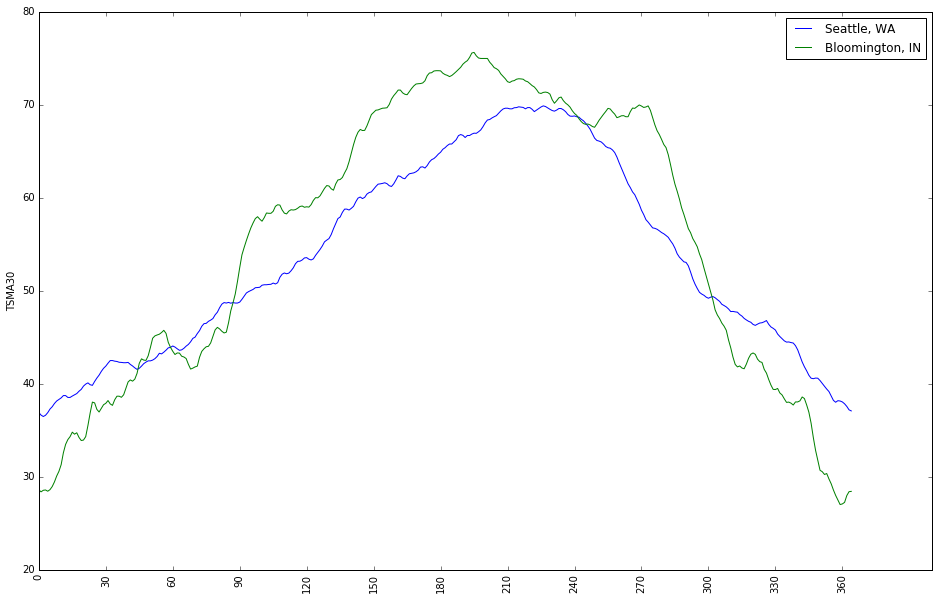

In [41]:
# Compare Seattle and Bloomington

df_sea['TSMA30'] = pd.DataFrame(np.concatenate([df_sea.TAVG.iloc[-15:].values, df_sea.TAVG.values, df_sea.TAVG.iloc[:15].values])).rolling(window=30, center=True).mean().iloc[15:-15].reset_index(drop=True)

plt.figure(figsize=(16,10))
g = sns.lineplot(x=df_sea.index, y='TSMA30', data=df_sea)
g = sns.lineplot(x=df.index, y='TSMA30', data=df)
g.set(xticks=df.index[0::30])
g.set_xticklabels(df.index[0::30], rotation=90)
g.legend(labels=['Seattle, WA', 'Bloomington, IN'])

plt.show()

In [42]:
# Linear regression - Polynomial Degree 4

x_sea = df_sea.index.values.reshape(-1, 1)
x_sea = np.hstack((x_sea, x_sea**2, x_sea**3, x_sea**4))

regr_sea = linear_model.LinearRegression()
regr_sea.fit(x, df_sea.TAVG)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

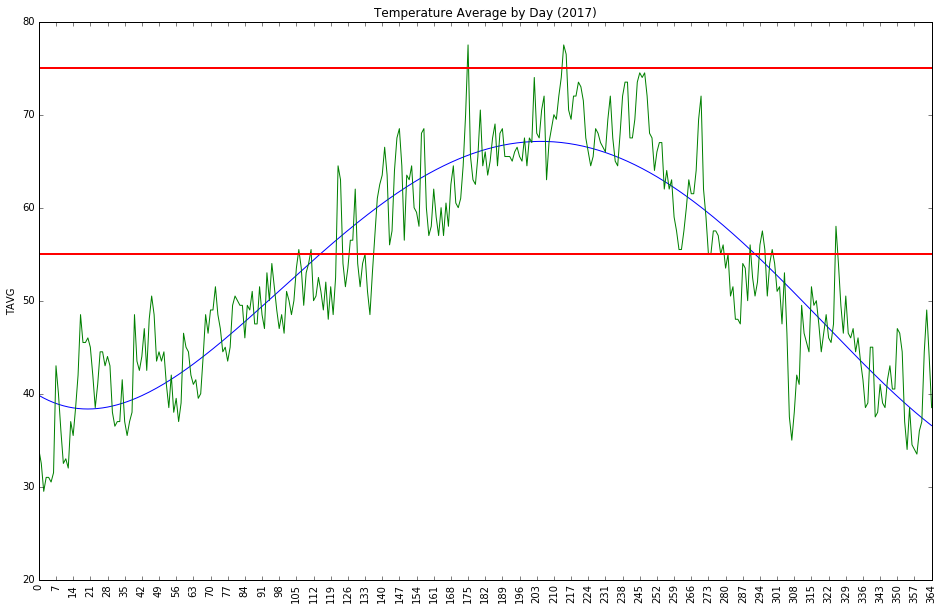

R^2: -1.4368182131014087


In [23]:
line_sea = regr_sea.predict(x_sea)

plt.figure(figsize=(16,10))
g = sns.lineplot(x=df_sea.index, y=line_sea, data=df_sea)
g.set(xticks=df_sea.index[0::7])
g.set_xticklabels(df_sea.index[0::7], rotation=90)
g.set_title('Temperature Average by Day (2017)')
sns.lineplot(x=df_sea.index, y='TAVG', data=df_sea)

plt.plot([0, 364], [75, 75], linewidth=2, color='red')
plt.plot([0, 364], [55, 55], linewidth=2, color='red')

plt.show()
print('R^2:', metrics.r2_score(df_sea.index.values.reshape(-1, 1), line))

In [24]:
print("Percent in 'Goldilocks Zone' (55-75):", len(df_sea.TAVG[(df_sea.TAVG <= 75) & (df_sea.TAVG >= 55)]) / 365 * 100)

Percent in 'Goldilocks Zone' (55-75): 42.465753424657535


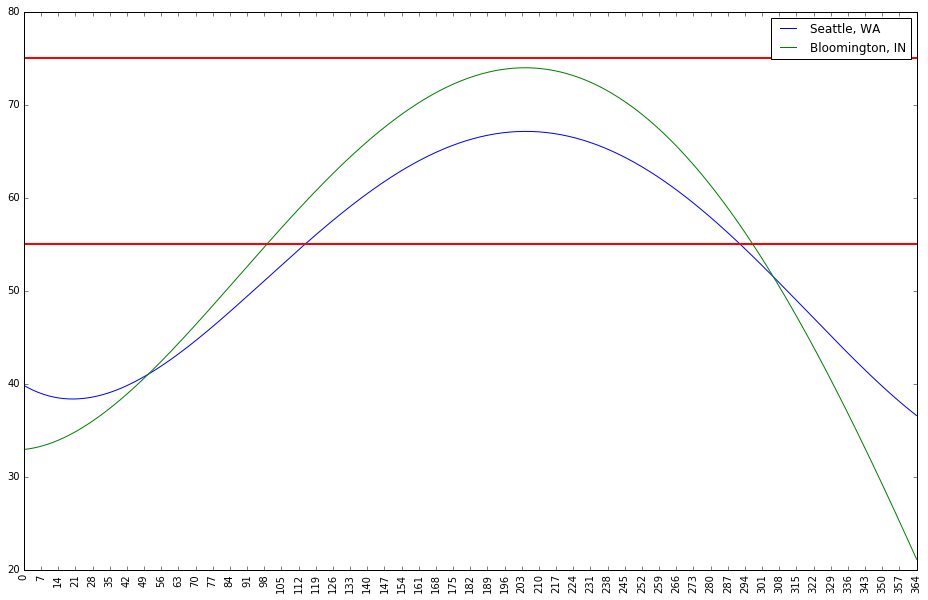

In [43]:
plt.figure(figsize=(16,10))
g = sns.lineplot(x=df_sea.index, y=line_sea, data=df_sea)
g = sns.lineplot(x=df.index, y=line, data=df)
g.set(xticks=df_sea.index[0::7])
g.set_xticklabels(df_sea.index[0::7], rotation=90)
g.legend(labels=['Seattle, WA', 'Bloomington, IN'])

plt.plot([0, 364], [75, 75], linewidth=2, color='red')
plt.plot([0, 364], [55, 55], linewidth=2, color='red')

plt.show()

In [53]:
print("Bloomington - Max Yearly Temp: {}, Min Yearly Temp: {}".format(df.TAVG.max(), df.TAVG.min()))
print("Seattle - Max Yearly Temp: {}, Min Yearly Temp: {}".format(df_sea.TAVG.max(), df_sea.TAVG.min()))

Bloomington - Max Yearly Temp: 85.0, Min Yearly Temp: 4.5
Seattle - Max Yearly Temp: 77.5, Min Yearly Temp: 29.5


### Precipitation

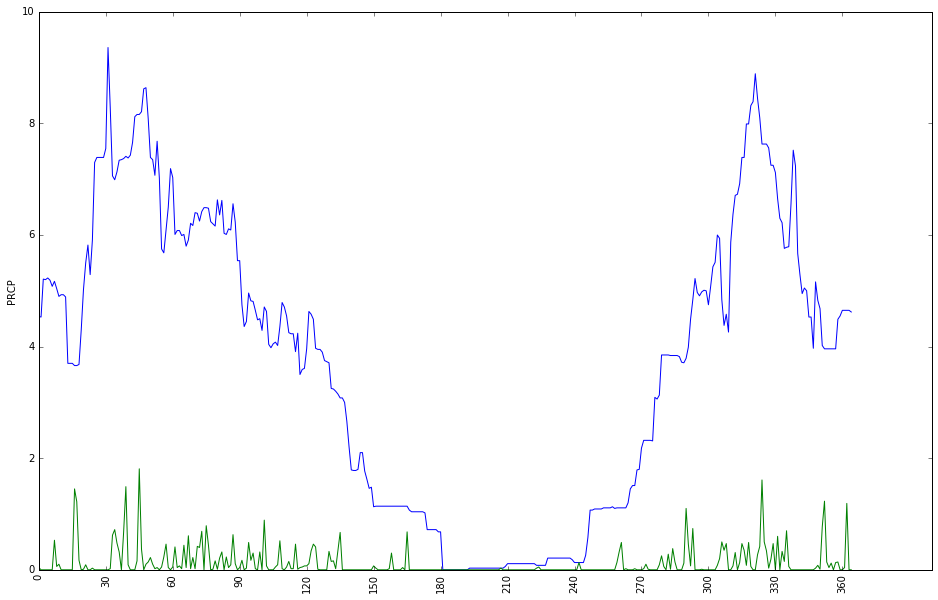

In [26]:
df_sea['PSMS30'] =  pd.DataFrame(np.concatenate([df_sea.PRCP.iloc[-15:].values, df_sea.PRCP.values, df_sea.PRCP.iloc[:15].values])).rolling(window=30, center=True).sum().iloc[15:-15].reset_index(drop=True)

plt.figure(figsize=(16,10))
g = sns.lineplot(x=df_sea.index, y='PSMS30', data=df_sea)
g = sns.lineplot(x=df_sea.index, y='PRCP', data=df_sea)
g.set(xticks=df_sea.index[0::30])
g.set_xticklabels(df_sea.index[0::30], rotation=90)

plt.show()

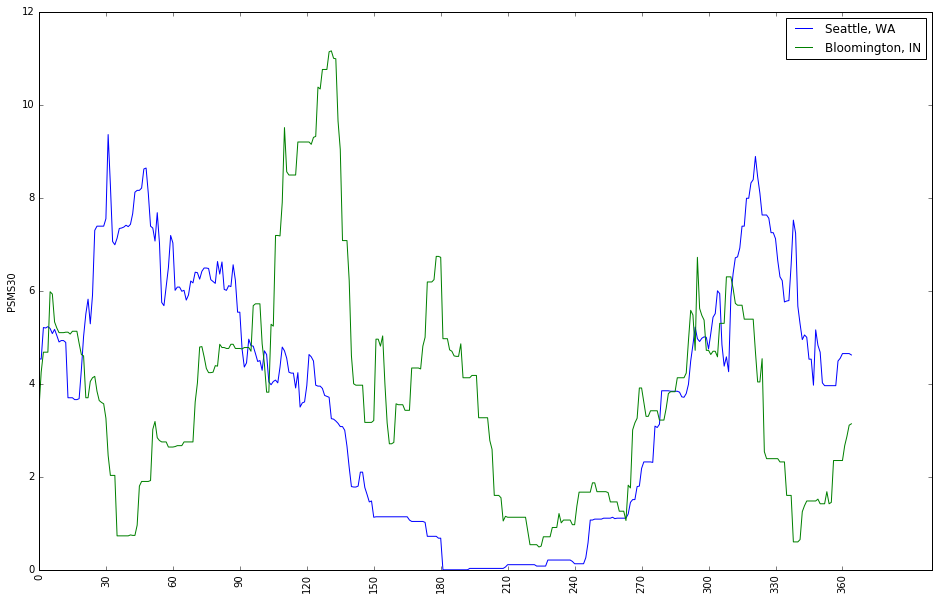

In [45]:
plt.figure(figsize=(16,10))
g = sns.lineplot(x=df_sea.index, y='PSMS30', data=df_sea)
g = sns.lineplot(x=df.index, y='PSMS30', data=df)
g.set(xticks=df_sea.index[0::30])
g.set_xticklabels(df_sea.index[0::30], rotation=90)
g.legend(labels=['Seattle, WA', 'Bloomington, IN'])

plt.show()

In [28]:
print("Bloomington Yearly Rainfall: ", np.sum(df.PRCP), 'in.')
print("Seattle Yearly Rainfall: ", np.sum(df_sea.PRCP), 'in.')

Bloomington Yearly Rainfall:  46.36 in.
Seattle Yearly Rainfall:  44.83 in.


In [51]:
print("Bloomington Number of Rainy Days a Year: ", len(df.PRCP[df.PRCP != 0]))
print("Seattle Number of Rainy Days a Year: ", len(df_sea.PRCP[df_sea.PRCP != 0]))

Bloomington Number of Rainy Days a Year:  120
Seattle Number of Rainy Days a Year:  161


In [59]:
print("Bloomington Avg Inches Rainfall on Rainy Days: ", df.PRCP[df.PRCP != 0].mean())
print("Seattle Avg Inches Rainfall on Rainy Days: ", df_sea.PRCP[df_sea.PRCP != 0].mean())

Bloomington Avg Inches Rainfall on Rainy Days:  0.3863333333333333
Seattle Avg Inches Rainfall on Rainy Days:  0.2784472049689441


### Snow

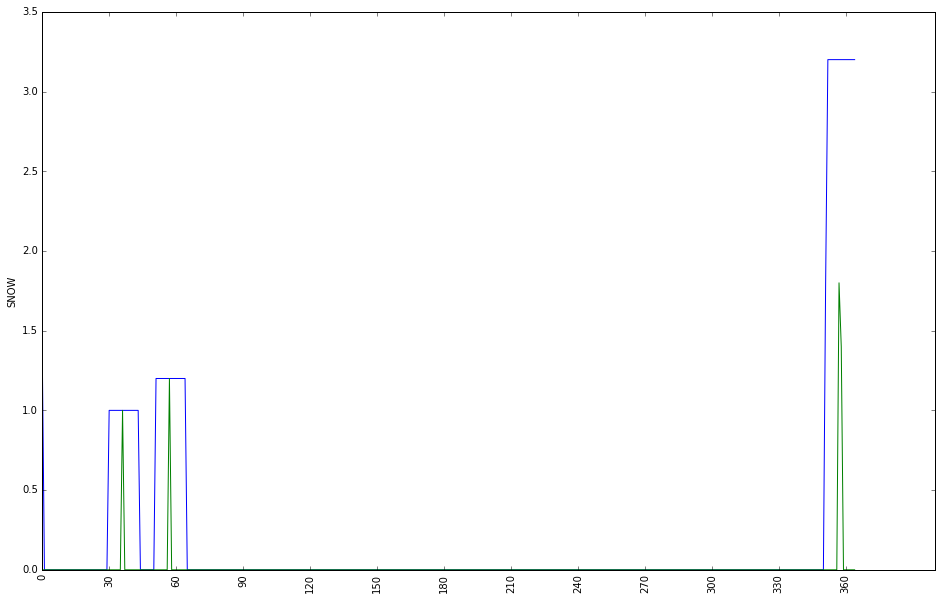

In [29]:
df_sea['SSMS14'] =  pd.DataFrame(np.concatenate([df_sea.SNOW.iloc[-15:].values, df_sea.SNOW.values, df_sea.SNOW.iloc[:15].values])).rolling(window=14, center=True).sum().iloc[15:-15].reset_index(drop=True)

plt.figure(figsize=(16,10))
g = sns.lineplot(x=df_sea.index, y='SSMS14', data=df_sea)
g = sns.lineplot(x=df_sea.index, y='SNOW', data=df_sea)
g.set(xticks=df_sea.index[0::30])
g.set_xticklabels(df_sea.index[0::30], rotation=90)

plt.show()

In [30]:
print("Bloomington Yearly Snow: ", np.sum(df.SNOW), 'in.')
print("Seattle Yearly Snow: ", np.sum(df_sea.SNOW), 'in.')

Bloomington Yearly Snow:  3.7 in.
Seattle Yearly Snow:  5.4 in.


- Seattle temperature changes more slowly and has higher lows and lower highs
- Roughly same amount rain and snow per inch of precipitation
- Seattle is split into Wet and Dry Seasons (Winter and Summer) and rains 40 more days
- It rains heavier in Bloomington. When it rains, .1 more inches of precipitation
- Bloomington is rains year round but more so in the spring

Bloomington Rain Months:
* Jan
* Mar - Jul
* Sep - Nov

Seattle Rain Months:
* Sep - Apr